# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.



- P(Rmin=1) = 11/36
- P(Rmin=2) = 9/36
- P(Rmin=3) = 7/36
- P(Rmin=4) = 5/36
- P(Rmin=5) = 3/36
- P(Rmin=6) = 1/36

P(Rmin=1), P(Rmin=2) and P(Rmin=3) are more likely since each are more than 1/6th, which is the likliness of landing on each side when rolling one die.

expected value of R min = 1(11/36) + 2(9/36) + 3(7/36) + 4(5/36) + 5(3/36) + 6(1/36) = 91/36



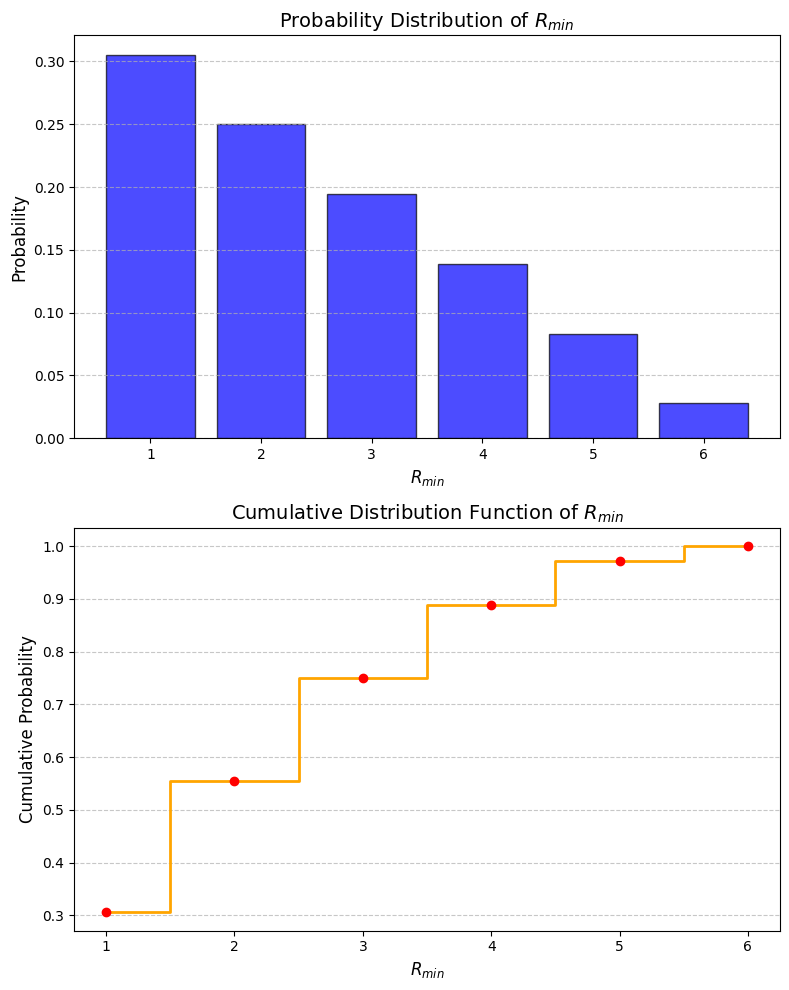

In [1]:

import numpy as np
import matplotlib.pyplot as plt

r_min_values = np.array([1, 2, 3, 4, 5, 6])
probabilities = np.array([11/36, 9/36, 7/36, 5/36, 3/36, 1/36])

cumulative_probabilities = np.cumsum(probabilities)
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

ax[0].bar(r_min_values, probabilities, color='blue', alpha=0.7, edgecolor='black')
ax[0].set_title('Probability Distribution of $R_{min}$', fontsize=14)
ax[0].set_xlabel('$R_{min}$', fontsize=12)
ax[0].set_ylabel('Probability', fontsize=12)
ax[0].set_xticks(r_min_values)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

ax[1].step(r_min_values, cumulative_probabilities, where='mid', color='orange', linewidth=2)
ax[1].scatter(r_min_values, cumulative_probabilities, color='red', zorder=5)
ax[1].set_title('Cumulative Distribution Function of $R_{min}$', fontsize=14)
ax[1].set_xlabel('$R_{min}$', fontsize=12)
ax[1].set_ylabel('Cumulative Probability', fontsize=12)
ax[1].set_xticks(r_min_values)
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The hand calculation of the pdf and cdf of Rmin is shown above with the probabilities of rolling a minimum of 1-6 as the calculated probabilityies (11/36, 9/36 etc...). I did that by adding all of the outcomes of the least min of 1 (for ex): (1,1),(1,2),(1,3),(1,4),(1,5),(1,6),(2,1),(3,1),(4,1),(5,1),(6,1) = 11/36 and so on....

Below is the law of large numbers simulation which shows that as the number of trials increases, the average of the outcomes will converge to the expected value.

In [4]:
import numpy as np

np.random.seed(42)  # For reproducibility
n_simulations = 100000  # Number of simulations

dice_rolls = np.random.randint(1, 7, size=(n_simulations, 2))

r_min_simulated = np.min(dice_rolls, axis=1)

simulated_expected_value = np.mean(r_min_simulated)

print(f"Simulated Expected Value of R_min: {simulated_expected_value}")

Simulated Expected Value of R_min: 2.52889



2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.

- P(Rmed=1) = 1/216
- P(Rmed=2) = 15/216
- P(Rmed=3) = 24/216
- P(Rmed=4) = 27/216
- P(Rmed=5) = 24/216
- P(Rmed=6) = 15/216

The probability of rolling k on one die is 36/216, so all of the R (med) values 1-6, are less than this.  

expected value of R(med) = 1(1/216)+2(15/216)+3(24/216)+4(27/216)+5(24/216)+6(15/216) =1.94907407407


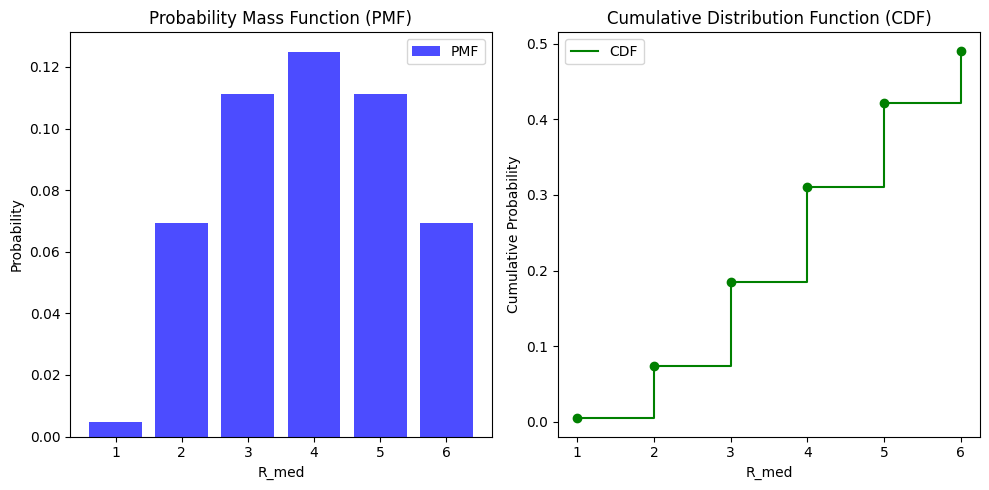

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rmed_values = np.array([1, 2, 3, 4, 5, 6])
rmed_probs = np.array([1/216, 15/216, 24/216, 27/216, 24/216, 15/216])

rmed_cdf = np.cumsum(rmed_probs)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(rmed_values, rmed_probs, color='blue', alpha=0.7, label='PMF')
plt.xticks(rmed_values)
plt.xlabel('R_med')
plt.ylabel('Probability')
plt.title('Probability Mass Function (PMF)')
plt.legend()

plt.subplot(1, 2, 2)
plt.step(rmed_values, rmed_cdf, where='post', color='green', label='CDF')
plt.scatter(rmed_values, rmed_cdf, color='green')
plt.xticks(rmed_values)
plt.xlabel('R_med')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF)')
plt.legend()

plt.tight_layout()
plt.show()


3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

Expected Value: 4.20156

Probabilities (first 15 totals):
Total 1: 0.16666
Total 2: 0.16611
Total 3: 0.16678
Total 4: 0.16670
Total 5: 0.16718
Total 7: 0.02778
Total 8: 0.02776
Total 9: 0.02774
Total 10: 0.02753
Total 11: 0.02781
Total 13: 0.00469
Total 14: 0.00468
Total 15: 0.00470
Total 16: 0.00461
Total 17: 0.00465


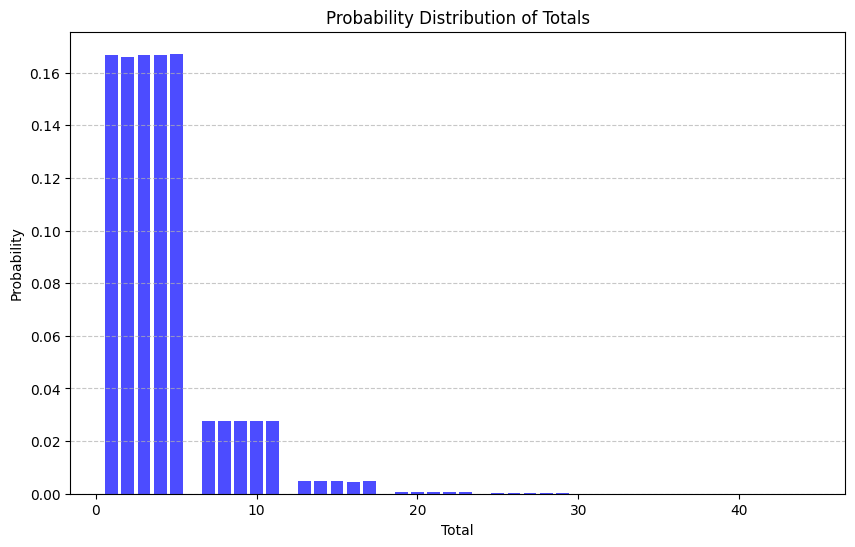

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

#used chat for this

# Simulation parameters
n_simulations = 1_000_000  # Number of simulated games
totals = []  # Store the total scores from each game

# Simulate the process
for _ in range(n_simulations):
    total = 0
    while True:
        roll = np.random.randint(1, 7)  # Roll a six-sided die
        total += roll
        if roll != 6:  # Stop if the roll is not 6
            break
    totals.append(total)

# Calculate the expected value using the law of large numbers
expected_value = np.mean(totals)

# Calculate the probabilities of each total
total_counts = Counter(totals)
probabilities = {total: count / n_simulations for total, count in total_counts.items()}

# Print the expected value
print(f"Expected Value: {expected_value:.5f}")

# Print some probabilities for illustration
print("\nProbabilities (first 15 totals):")
for total in sorted(probabilities.keys())[:15]:
    print(f"Total {total}: {probabilities[total]:.5f}")

# Plot the probabilities
x_vals = sorted(probabilities.keys())
y_vals = [probabilities[x] for x in x_vals]

plt.figure(figsize=(10, 6))
plt.bar(x_vals, y_vals, color='blue', alpha=0.7)
plt.xlabel('Total')
plt.ylabel('Probability')
plt.title('Probability Distribution of Totals')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups.
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

In [9]:
import pandas as pd

df = pd.read_csv('mammogram.csv', sep='\t')
df.head()

,"treatment,breast_cancer_death"
0,"mammogram,yes"
1,"mammogram,yes"
2,"mammogram,yes"
3,"mammogram,yes"
4,"mammogram,yes"


In [12]:
import pandas as pd

cross_tab = pd.crosstab(df['treatment'], df['breast_cancer_death'])
print("Cross-tabulation:\n", cross_tab)

survival_rates = cross_tab['no'] / cross_tab.sum(axis=1) * 100
print("\n25-year survival rates (%):\n", survival_rates)

difference = survival_rates['mammogram'] - survival_rates['control']
print(f"\nDifference in 25-year survival rates: {difference:.2f}%")

Cross-tabulation:
 breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500

25-year survival rates (%):
 treatment
control      98.875529
mammogram    98.887034
dtype: float64

Difference in 25-year survival rates: 0.01%


It says the difference in survival rates is 0.01 percent.

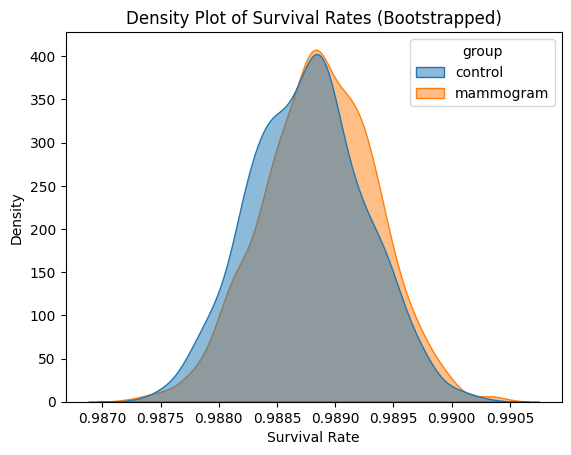

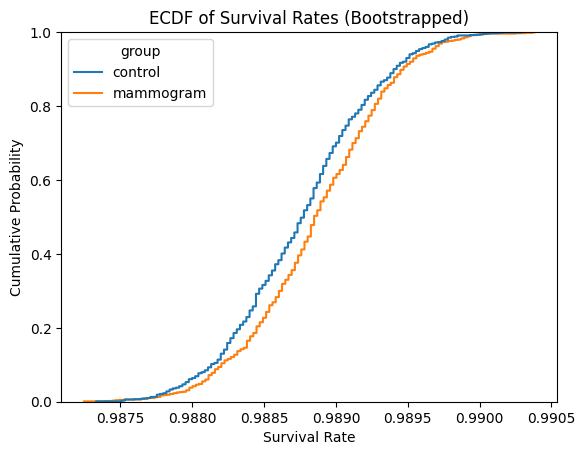

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#used chat for below
# Load the mammogram.csv data
df = pd.read_csv('mammogram.csv')

# Add a column for survival (1 = no death, 0 = death)
df['survived'] = (df['breast_cancer_death'] == 'no').astype(int)

# Separate data by treatment group
df_control = df.loc[df['treatment'] == 'control', 'survived']
df_mammogram = df.loc[df['treatment'] == 'mammogram', 'survived']

# Number of samples in each group
N_control = df_control.shape[0]
N_mammogram = df_mammogram.shape[0]

# Bootstrapping parameters
S = 1000  # Number of bootstrap simulations
rate_control = np.zeros(S)  # Control survival rates
rate_mammogram = np.zeros(S)  # Mammogram survival rates

# Bootstrapping
for s in range(S):
    # Resample with replacement
    sample_control = df_control.sample(N_control, replace=True)
    sample_mammogram = df_mammogram.sample(N_mammogram, replace=True)

    # Calculate mean survival rate for each resample
    rate_control[s] = sample_control.mean()
    rate_mammogram[s] = sample_mammogram.mean()

# Combine results into a DataFrame for visualization
rdf_control = pd.DataFrame({'group': 'control', 'survival_rate': rate_control})
rdf_mammogram = pd.DataFrame({'group': 'mammogram', 'survival_rate': rate_mammogram})
rdf = pd.concat([rdf_control, rdf_mammogram], axis=0)

# Density plot of survival rates
sns.kdeplot(data=rdf, x='survival_rate', hue='group', fill=True, alpha=0.5)
plt.title("Density Plot of Survival Rates (Bootstrapped)")
plt.xlabel("Survival Rate")
plt.ylabel("Density")
plt.show()

# ECDF (Empirical Cumulative Distribution Function) plot of survival rates
sns.ecdfplot(data=rdf, x='survival_rate', hue='group')
plt.title("ECDF of Survival Rates (Bootstrapped)")
plt.xlabel("Survival Rate")
plt.ylabel("Cumulative Probability")
plt.show()


In [19]:

bootstrapped_diff = rate_mammogram - rate_control

# Calculate the 99% confidence interval
lower_bound = np.percentile(bootstrapped_diff, 0.5)  # 0.5th percentile
upper_bound = np.percentile(bootstrapped_diff, 99.5)  # 99.5th percentile

print(lower_bound,upper_bound)

-0.0017555254080782962 0.0017850126147304888


Yes, this interval includes zero.

If the mammogram group consisted of healthier women than the control group, survival rates might appear better than they truly are. Additional data that would be good to have is stage of cancer, pre existing health conditions, family history of breast cancer, and the frequency of screening in the control group and treatment received. This would help evaluate how different groups respond to the treatment.

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.
2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?
4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
5. Which treatment appears to be the most effective overall?

**Q4.** The goal of the question is to incorporate features/covariates/predictors/explanatory variables into the kind of treatment effect comparisons done in the previous questions. This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).
2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on transplant, age, and transplant$\times$age. You can do this using a linear regression. How do the intercept and the coefficient on `transplanttreatment` change?
4. Add the intercept and the transplanttreatment coefficients together from part 3. What do you get? Does that make sense? What are you missing in predicting survival probability this way?
5. Plot the predicted survival probability by age for people who receive a heart transplant and those who don't. Describe what you see.
6. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?

**Q5.** This question refers to `mn_police_use_of_force.csv`. This includes reports on the Minnesota police department's use of force from 1/1/2016 to 8/31/2021. This is, perhaps, a potentially controversial set of data to look at, but I imagine many students sincerely want to think about the difficult questions that society grapples with, what kind of evidence exists, and how they might analyze it using tools from class. We should also always be skeptical of data, particularly when the source has an interest in controlling our beliefs and can define or omit data to advance its interests.

The data include:
- `response_datetime`: DateTime of police response.
- `problem`: Problem that required police response.
- `is_911_call`: Whether response was iniated by call to 911.
- `primary_offense`: Offense of subject.
- `subject_injury`: Whether subject was injured Yes/No/null.
- `force_type`: Type of police force used.
- `force_type_action`: Detail of police force used.
- `race`: Race of subject.
- `sex`: Gender of subject.
- `age`: Age of subject.
- `type_resistance`: Resistance to police by subject.
- `precinct`: Precinct where response occurred.
- `neighborhood`: Neighborhood where response occurred.

To answer the following questions, you need to make choices about what to focus on and how to conduct the analysis. Explain your choices and defend them where appropriate.

1. Are there significant missing values? In what variables? In particular, consider `subject_injury`. Clearly discuss what you find.
2. Cross tabulate `race` and `force_type`. What patterns do you notice? Use the options `normalize='columns'` and `normalize='rows'`, and `margins=True` to explore different ways of normalizing the data to better understand results by race.
3. Use tables, crosstabulation and the bootstrap to investigate the extent to which `force_type` varies between different races.
4. Use tables, crosstabulation and the bootstrap to investigate the extent to which `Maximal Restraint Technique` varies between different races.
5. Use tables, crosstabulation and the bootstrap to investigate the extent to which `subject_injury` varies between different races. Please be clear about how you address the large number of NaN's (you might even use the other data to look at what predicts a NaN in this column to see if there are systematic patterns).
6. Summarize your findings.